In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from pbcpy.base import Celle
from pbcpy.grid import Grid
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space
from pbcpy.base import Coord
from pbcpy.system import System
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

# Big Data from Al:

* reading in $\rho_{i}$ and $v_{T}$ from calculations

In [2]:
data_dens = np.array([])
data_vt = np.array([])

In [3]:
for i in range(1,30):
    if i == 68:
        print('NOT CONVERGED')
    else:
        print(i)
        density = PP('Densities2/Al_'+str(i)+'_0_fde_0rho.pp').read()
        kin_pot = PP('Potentials2/Al_'+str(i)+'_0_vt_rhotot_alph.pp').read()
    
        rho = density.plot
        v_t = kin_pot.plot
    
        grid_real_rho = Grid_Space(rho.grid.at,rho.grid.nr)
        grid_real_vt = Grid_Space(v_t.grid.at,v_t.grid.nr)

        mydens = Grid_Function(grid_real_rho,griddata_3d=rho.values)
        myvt = Grid_Function(grid_real_vt,griddata_3d=v_t.values)
 
        x = np.reshape(mydens.values,(np.shape(mydens.values)[0]*np.shape(mydens.values)[1]*np.shape(mydens.values)[2],))
        y = np.reshape(myvt.values, (np.shape(myvt.values)[0]*np.shape(myvt.values)[1]*np.shape(myvt.values)[2],))
    
        data_dens = np.append(data_dens, x)
        data_vt = np.append(data_vt, y)   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [4]:
np.shape(data_dens), data_vt.size

((3625000,), 3625000)

In [5]:
indx  = np.argsort(data_dens)
indx2 = np.argsort(data_vt)
indx, indx2

(array([322416, 319916, 322417, ..., 619482, 619533, 619483]),
 array([ 589482, 2915841, 2903016, ...,  619533,  619482,  619483]))

In [6]:
X=data_dens[indx]
Y=data_vt[indx2]

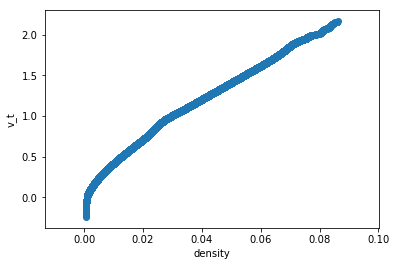

In [7]:
plt.scatter(X,Y,)
plt.xlabel('density')
plt.ylabel('v_t')
plt.show()

In [8]:
X=np.reshape(X,(np.shape(X)[0],1))
Y=np.reshape(Y,(np.shape(Y)[0],1))

np.shape(X), np.shape(Y)

((3625000, 1), (3625000, 1))

In [9]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.score(X,Y)

0.98281365338477311

In [17]:
acc = model.predict(X)-Y

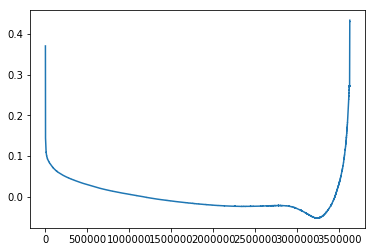

In [18]:
plt.plot(acc)
plt.show()

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
model2 = MLPRegressor(hidden_layer_sizes=(5,5), alpha=0.01)

In [21]:
y2 = np.reshape(Y, len(Y))
y2

array([-0.2414055 , -0.21960791, -0.21021685, ...,  2.16117163,
        2.16162465,  2.16392688])

In [22]:
model2.fit(X,y2)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [205]:
model2.score(X,Y)

-0.0001738090732001929

In [206]:
acc2 = model2.predict(X)-y2
np.shape(y2)

(3258044,)

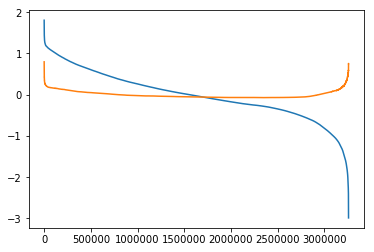

In [207]:
plt.plot(acc2)
plt.plot(acc)

plt.show()